In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import collections
%matplotlib inline

from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

# Raw DataFrame

In [2]:
# read in the Chicagov Divvy Bicycle Sharing Data csv files from Kaggle
pd.set_option('display.max_columns', 30)
filename = 'data.csv'
df = pd.read_csv(filename)
df.head()

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,events,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,10.066667,68.0,tstorms,131,Lincoln Ave & Belmont Ave,41.939365,-87.668385,15.0,303,Broadway & Cornelia Ave,41.945512,-87.645980,15.0
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,4.383333,68.0,tstorms,282,Halsted St & Maxwell St,41.864580,-87.646930,15.0,22,May St & Taylor St,41.869482,-87.655486,15.0
2,2355130,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:33:00,2014-06-30 23:35:00,2.100000,68.0,tstorms,327,Sheffield Ave & Webster Ave,41.921687,-87.653714,19.0,225,Halsted St & Dickens Ave,41.919936,-87.648830,15.0
3,2355129,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:26:00,2014-07-01 00:24:00,58.016667,68.0,tstorms,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,194,State St & Wacker Dr,41.887155,-87.627750,11.0
4,2355128,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:16:00,2014-06-30 23:26:00,10.633333,68.0,tstorms,320,Loomis St & Lexington St,41.872187,-87.661501,15.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0


In [3]:
# show column types and if there are any null values present
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495235 entries, 0 to 9495234
Data columns (total 23 columns):
trip_id              9495235 non-null int64
year                 9495235 non-null int64
month                9495235 non-null int64
week                 9495235 non-null int64
day                  9495235 non-null int64
hour                 9495235 non-null int64
usertype             9495235 non-null object
gender               9495235 non-null object
starttime            9495235 non-null object
stoptime             9495235 non-null object
tripduration         9495235 non-null float64
temperature          9495235 non-null float64
events               9495235 non-null object
from_station_id      9495235 non-null int64
from_station_name    9495235 non-null object
latitude_start       9495235 non-null float64
longitude_start      9495235 non-null float64
dpcapacity_start     9495235 non-null float64
to_station_id        9495235 non-null int64
to_station_name      9495235 non-nu

# Data Cleaning and Wrangling

### Trip ID Column

In [4]:
# check for unique trip_ids
df.trip_id.value_counts();

In [5]:
# look at one instance of trip_id where there are duplicate rows
df[df['trip_id']==11693784]

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,events,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
5250863,11693784,2016,9,35,6,12,Subscriber,Male,2016-09-04 12:06:52,2016-09-04 12:12:57,6.1,78.1,cloudy,334,Lake Shore Dr & Belmont Ave,41.940775,-87.639192,19.0,117,Wilton Ave & Belmont Ave,41.94018,-87.65304,23.0
5250864,11693784,2016,9,35,6,12,Subscriber,Male,2016-09-04 12:06:52,2016-09-04 12:12:57,6.1,78.1,cloudy,334,Lake Shore Dr & Belmont Ave,41.940775,-87.639192,19.0,117,Wilton Ave & Belmont Ave,41.94018,-87.65304,23.0


In [6]:
# since there were some trip_ids with more than one count, determine the count of unique rows
df.trip_id.nunique()

9495188

In [7]:
# drop rows with duplicate data 
data = df.copy()
data = data.drop_duplicates().sort_values('trip_id')

In [8]:
# make sure the entries match our nunique count 
data.info(null_counts=True);

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9495188 entries, 576426 to 8911697
Data columns (total 23 columns):
trip_id              9495188 non-null int64
year                 9495188 non-null int64
month                9495188 non-null int64
week                 9495188 non-null int64
day                  9495188 non-null int64
hour                 9495188 non-null int64
usertype             9495188 non-null object
gender               9495188 non-null object
starttime            9495188 non-null object
stoptime             9495188 non-null object
tripduration         9495188 non-null float64
temperature          9495188 non-null float64
events               9495188 non-null object
from_station_id      9495188 non-null int64
from_station_name    9495188 non-null object
latitude_start       9495188 non-null float64
longitude_start      9495188 non-null float64
dpcapacity_start     9495188 non-null float64
to_station_id        9495188 non-null int64
to_station_name      9495188 n

In [9]:
# check each trip id has a single count
data.trip_id.value_counts();

The duplicate trip_ids have been dropped, so each trip_id is a unique event. There are 9495188 values in every column, and there are no null values. 

### General cleaning steps for easier use

In [10]:
# convert start and stop times to datetimes
data['starttime'] = pd.to_datetime(data['starttime'])
data['stoptime'] = pd.to_datetime(data['stoptime'])

In [11]:
# rename day column to numerical day of week
data = data.rename(columns={'day':'num_day_of_week'})

In [12]:
# create new column with the name of the week 
data['day_of_week'] = data['starttime'].dt.weekday_name

In [13]:
# create new column with numerical day of the month
data['day'] = data['starttime'].dt.day

In [14]:
# sort columns
pd.set_option('display.max_columns', 30)
data = data[['trip_id','year','month','week','day','hour','num_day_of_week','day_of_week',
             'starttime','stoptime','tripduration','temperature','events','usertype','gender',
             'from_station_id','from_station_name','latitude_start','longitude_start','dpcapacity_start',
             'to_station_id','to_station_name','latitude_end','longitude_end','dpcapacity_end']]
data.head()

,trip_id,year,month,week,day,hour,num_day_of_week,day_of_week,starttime,stoptime,tripduration,temperature,events,usertype,gender,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
576426,1109427,2014,1,1,1,1,2,Wednesday,2014-01-01 01:12:00,2014-01-01 01:18:00,5.766667,10.9,not clear,Subscriber,Male,240,Sheridan Rd & Irving Park Rd,41.954245,-87.654406,23.0,245,Clarendon Ave & Junior Ter,41.961004,-87.649603,15.0
576425,1109431,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.833333,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0
576424,1109432,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.866667,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0
576423,1109434,2014,1,1,1,1,2,Wednesday,2014-01-01 01:44:00,2014-01-01 01:59:00,15.266667,10.9,not clear,Subscriber,Male,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0
576422,1109435,2014,1,1,1,1,2,Wednesday,2014-01-01 01:45:00,2014-01-01 02:00:00,15.066667,10.9,not clear,Subscriber,Female,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0


### Capacity

In [15]:
departures = data[['starttime','from_station_name','trip_id']].sort_values(['from_station_name','starttime'])
departures = departures.rename(columns={'starttime':'datetime','from_station_name':'station_name'})

In [16]:
# each departure is given a 1 value
departures['trip_counts'] = 1

In [17]:
arrivals = data[['starttime','to_station_name','trip_id']].sort_values(['to_station_name','starttime'])
arrivals = arrivals.rename(columns={'starttime':'datetime','to_station_name':'station_name'})

In [18]:
# each arrivals is given a -1 value
arrivals['trip_counts'] = -1

In [19]:
departures_and_arrivals = pd.concat([departures, arrivals])
departures_and_arrivals = departures_and_arrivals.sort_values(['station_name','datetime'])
departures_and_arrivals['date'] = departures_and_arrivals['datetime'].dt.date
departures_and_arrivals = departures_and_arrivals[['datetime','date','station_name','trip_id','trip_counts']]
departures_and_arrivals.head()

,datetime,date,station_name,trip_id,trip_counts
2146845,2015-05-17 12:41:00,2015-05-17,2112 W Peterson Ave,5197801,-1
2146213,2015-05-17 14:06:00,2015-05-17,2112 W Peterson Ave,5199604,1
2140550,2015-05-18 10:36:00,2015-05-18,2112 W Peterson Ave,5212990,-1
2140518,2015-05-18 10:47:00,2015-05-18,2112 W Peterson Ave,5213095,1
2107385,2015-05-22 16:41:00,2015-05-22,2112 W Peterson Ave,5274966,-1


In [20]:
# get running sum of departures-arrivals
departures_and_arrivals['cumulative_sum'] = departures_and_arrivals.groupby(['station_name','date'])['trip_counts'].cumsum()
departures_and_arrivals.head()


,datetime,date,station_name,trip_id,trip_counts,cumulative_sum
2146845,2015-05-17 12:41:00,2015-05-17,2112 W Peterson Ave,5197801,-1,-1
2146213,2015-05-17 14:06:00,2015-05-17,2112 W Peterson Ave,5199604,1,0
2140550,2015-05-18 10:36:00,2015-05-18,2112 W Peterson Ave,5212990,-1,-1
2140518,2015-05-18 10:47:00,2015-05-18,2112 W Peterson Ave,5213095,1,0
2107385,2015-05-22 16:41:00,2015-05-22,2112 W Peterson Ave,5274966,-1,-1


In [21]:
# maximum departures-arrivals for each station 
max_sum = departures_and_arrivals.groupby('station_name')['cumulative_sum'].max().reset_index()
max_sum.head()

,station_name,cumulative_sum
0,2112 W Peterson Ave,5
1,63rd St Beach,4
2,900 W Harrison,16
3,900 W Harrison St,15
4,Aberdeen St & Jackson Blvd,16


In [22]:
# maximum capacity at each station
max_cap = data[['from_station_name','dpcapacity_start']].drop_duplicates().groupby('from_station_name').max()
max_cap.head()

,dpcapacity_start
from_station_name,
2112 W Peterson Ave,15.0
63rd St Beach,23.0
900 W Harrison,19.0
900 W Harrison St,19.0
Aberdeen St & Jackson Blvd,15.0


In [23]:
df_merge_all = pd.merge(departures_and_arrivals, max_cap, how='left', left_on='station_name',right_on='from_station_name')


In [24]:
df_merge_all = df_merge_all.groupby(['station_name','date'])[['cumulative_sum','dpcapacity_start']].max().reset_index()
df_merge_all.head()

,station_name,date,cumulative_sum,dpcapacity_start
0,2112 W Peterson Ave,2015-05-17,0,15.0
1,2112 W Peterson Ave,2015-05-18,0,15.0
2,2112 W Peterson Ave,2015-05-22,0,15.0
3,2112 W Peterson Ave,2015-05-23,-1,15.0
4,2112 W Peterson Ave,2015-05-25,-1,15.0


In [25]:
df_merge_all['difference'] = df_merge_all['dpcapacity_start'] - df_merge_all['cumulative_sum']

In [26]:
# show all stations that exceed capacity
df_negative = df_merge_all[df_merge_all['difference']<-1]
df_negative.head()

,station_name,date,cumulative_sum,dpcapacity_start,difference
4320,Aberdeen St & Madison St,2014-09-06,32,19.0,-13.0
4321,Aberdeen St & Madison St,2014-09-07,23,19.0,-4.0
4322,Aberdeen St & Madison St,2014-09-08,24,19.0,-5.0
4330,Aberdeen St & Madison St,2014-09-17,39,19.0,-20.0
4331,Aberdeen St & Madison St,2014-09-18,42,19.0,-23.0


In [27]:
df_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5126 entries, 4320 to 572240
Data columns (total 5 columns):
station_name        5126 non-null object
date                5126 non-null object
cumulative_sum      5126 non-null int64
dpcapacity_start    5126 non-null float64
difference          5126 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 240.3+ KB


6205 out of 576538 unique stations and dates exceed capacity.

In [28]:
df_negative['date'].nunique()

1042

In [29]:
data['date'] = data['starttime'].dt.date

In [30]:
data = pd.merge(data, df_negative, how='outer', on='date', indicator=True).query('_merge == "left_only"').drop('_merge', 1)
data.head()

,trip_id,year,month,week,day,hour,num_day_of_week,day_of_week,starttime,stoptime,tripduration,temperature,events,usertype,gender,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start_x,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,date,station_name,cumulative_sum,dpcapacity_start_y,difference
0,1109427,2014,1,1,1,1,2,Wednesday,2014-01-01 01:12:00,2014-01-01 01:18:00,5.766667,10.9,not clear,Subscriber,Male,240,Sheridan Rd & Irving Park Rd,41.954245,-87.654406,23.0,245,Clarendon Ave & Junior Ter,41.961004,-87.649603,15.0,2014-01-01,NaN,NaN,NaN,NaN
1,1109431,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.833333,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,2014-01-01,NaN,NaN,NaN,NaN
2,1109432,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.866667,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,2014-01-01,NaN,NaN,NaN,NaN
3,1109434,2014,1,1,1,1,2,Wednesday,2014-01-01 01:44:00,2014-01-01 01:59:00,15.266667,10.9,not clear,Subscriber,Male,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,2014-01-01,NaN,NaN,NaN,NaN
4,1109435,2014,1,1,1,1,2,Wednesday,2014-01-01 01:45:00,2014-01-01 02:00:00,15.066667,10.9,not clear,Subscriber,Female,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,2014-01-01,NaN,NaN,NaN,NaN


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215118 entries, 0 to 52099463
Data columns (total 30 columns):
trip_id               1215118 non-null int64
year                  1215118 non-null int64
month                 1215118 non-null int64
week                  1215118 non-null int64
day                   1215118 non-null int64
hour                  1215118 non-null int64
num_day_of_week       1215118 non-null int64
day_of_week           1215118 non-null object
starttime             1215118 non-null datetime64[ns]
stoptime              1215118 non-null datetime64[ns]
tripduration          1215118 non-null float64
temperature           1215118 non-null float64
events                1215118 non-null object
usertype              1215118 non-null object
gender                1215118 non-null object
from_station_id       1215118 non-null int64
from_station_name     1215118 non-null object
latitude_start        1215118 non-null float64
longitude_start       1215118 non-null float64


### Datetime: year, month, week, day, hour

#### year

In [32]:
# value counts of the number of trip sorted by year
data.year.value_counts().sort_index();

#### month

In [33]:
# value counts of the number of trip sorted by month
data.month.value_counts().sort_index();

Text(0,0.5,'Percentage of Trips Taken')

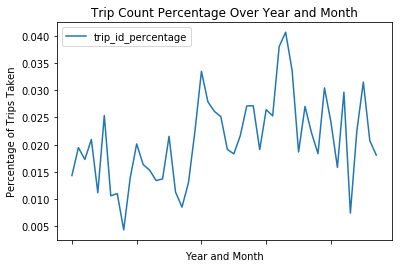

In [34]:
# group the year and month data, see how trips vary with time
year_month = data.groupby(['year','month']).agg({'trip_id': 'size'}).reset_index()
year_month['date']=year_month['year'].astype(str)+'_'+year_month['month'].astype(str)
year_month['trip_id_percentage'] = year_month['trip_id'] / year_month['trip_id'].sum()
year_month.plot(x='date',y='trip_id_percentage')
plt.title('Trip Count Percentage Over Year and Month')
plt.xlabel('Year and Month')
plt.ylabel('Percentage of Trips Taken')

#### week

In [35]:
# value counts of the number of trip sorted by week
data.week.value_counts().sort_index();

Text(0,0.5,'Percentage of Trips Taken')

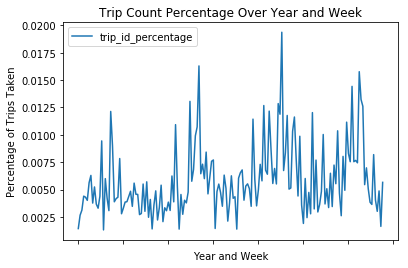

In [36]:
# group the year and week data, see how trips vary with time
year_week = data.groupby(['year','week']).agg({'trip_id': 'size'}).reset_index()
year_week['date']=year_week['year'].astype(str)+'_'+year_week['week'].astype(str)
year_week['trip_id_percentage'] = year_week['trip_id'] / year_week['trip_id'].sum()
year_week.plot(x='date',y='trip_id_percentage')
plt.title('Trip Count Percentage Over Year and Week')
plt.xlabel('Year and Week')
plt.ylabel('Percentage of Trips Taken')

#### day

In [37]:
# value counts of the number of trip sorted by day
data.day.value_counts().sort_index();

#### hour

In [38]:
# value counts of the number of trip sorted by hour
data.hour.value_counts().sort_index();

In [39]:
# percentage of trips taken during different hours
((data.hour.value_counts()/data.hour.count()) * 100).sort_index();

### Day of Week

In [40]:
# percentage of trips taken by different gender
(data['day_of_week'].value_counts()/data['day_of_week'].count()) * 100;

In [41]:
# value counts of trips taken on different days of the week
data['day_of_week'].value_counts().sort_index();

In [42]:
# value counts of trips taken on different days of the week (numerical)
data['num_day_of_week'].value_counts().sort_index();

### Usertype and Gender

In [43]:
# percentage of trips taken by different usertypes
(data.usertype.value_counts()/data.usertype.count()) * 100;

In [44]:
# percentage of trips taken by different gender
(data.gender.value_counts()/data.gender.count()) * 100;

### Duration

In [45]:
# see how the difference in stop/start time compares to the trip duration 
data['difference'] = data['stoptime'] - data['starttime']
data['tripduration_round'] = data['tripduration'].round(0)
data[['difference','tripduration_round']];

Text(0,0.5,'Number of Trips')

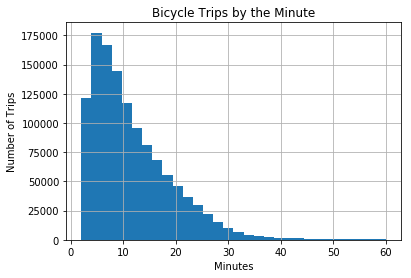

In [46]:
# histogram of trip durations
data.hist('tripduration', bins=30)
plt.title('Bicycle Trips by the Minute')
plt.xlabel('Minutes')
plt.ylabel('Number of Trips')

### Temperature and Weather 

Text(0,0.5,'Number of Trips')

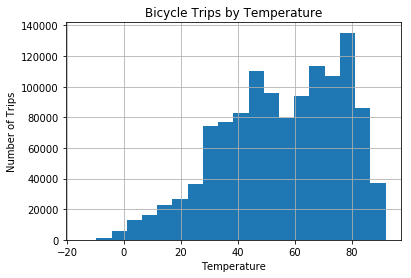

In [47]:
# histogram of the temperature data
data.hist('temperature', bins=20)
plt.title('Bicycle Trips by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Number of Trips')

In [48]:
# weather events
data.events.value_counts()

cloudy          1029073
rain or snow      86745
clear             81217
not clear         12163
tstorms            5920
Name: events, dtype: int64

Text(0,0.5,'Number of Trips')

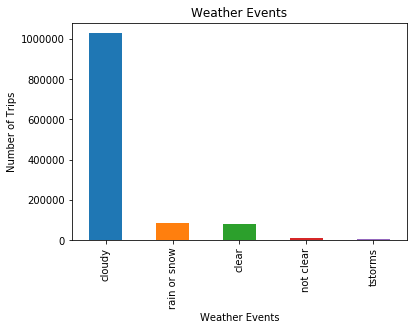

In [49]:
# bar chart to show relative frequencies of each weather event
data.events.value_counts().plot(kind='bar')
plt.title('Weather Events')
plt.xlabel('Weather Events')
plt.ylabel('Number of Trips')

### Stations

In [50]:
# create two lists with unique station ID's 
x = data['from_station_id'].drop_duplicates()
y = data['to_station_id'].drop_duplicates()

In [51]:
# see if multisets are equal 
collections.Counter(x) == collections.Counter(y)

False

In [52]:
data['to_station_name'].nunique()

648

In [53]:
data['from_station_name'].nunique()

650

### Location

In [54]:
# check maximum values to see if they are within reason with Chicago latitude and longitude
data[['latitude_start','longitude_start','latitude_end','longitude_end']].max();

In [55]:
# check minimum values to see if they are within reason with Chicago latitude and longitude
data[['latitude_start','longitude_start','latitude_end','longitude_end']].min();

# EDA - Binary

In [56]:
binary = data.copy()
binary.head()

,trip_id,year,month,week,day,hour,num_day_of_week,day_of_week,starttime,stoptime,tripduration,temperature,events,usertype,gender,...,from_station_name,latitude_start,longitude_start,dpcapacity_start_x,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,date,station_name,cumulative_sum,dpcapacity_start_y,difference,tripduration_round
0,1109427,2014,1,1,1,1,2,Wednesday,2014-01-01 01:12:00,2014-01-01 01:18:00,5.766667,10.9,not clear,Subscriber,Male,...,Sheridan Rd & Irving Park Rd,41.954245,-87.654406,23.0,245,Clarendon Ave & Junior Ter,41.961004,-87.649603,15.0,2014-01-01,NaN,NaN,NaN,00:06:00,6.0
1,1109431,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.833333,10.9,not clear,Subscriber,Male,...,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,2014-01-01,NaN,NaN,NaN,00:10:00,11.0
2,1109432,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.866667,10.9,not clear,Subscriber,Male,...,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,2014-01-01,NaN,NaN,NaN,00:10:00,11.0
3,1109434,2014,1,1,1,1,2,Wednesday,2014-01-01 01:44:00,2014-01-01 01:59:00,15.266667,10.9,not clear,Subscriber,Male,...,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,2014-01-01,NaN,NaN,NaN,00:15:00,15.0
4,1109435,2014,1,1,1,1,2,Wednesday,2014-01-01 01:45:00,2014-01-01 02:00:00,15.066667,10.9,not clear,Subscriber,Female,...,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,2014-01-01,NaN,NaN,NaN,00:15:00,15.0


In [57]:
binary['start_hour'] = binary.starttime.dt.hour
binary['end_hour'] = binary.stoptime.dt.hour
binary['across_day_count'] = binary['stoptime'].dt.day - binary['starttime'].dt.day
binary.head()

,trip_id,year,month,week,day,hour,num_day_of_week,day_of_week,starttime,stoptime,tripduration,temperature,events,usertype,gender,...,dpcapacity_start_x,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,date,station_name,cumulative_sum,dpcapacity_start_y,difference,tripduration_round,start_hour,end_hour,across_day_count
0,1109427,2014,1,1,1,1,2,Wednesday,2014-01-01 01:12:00,2014-01-01 01:18:00,5.766667,10.9,not clear,Subscriber,Male,...,23.0,245,Clarendon Ave & Junior Ter,41.961004,-87.649603,15.0,2014-01-01,NaN,NaN,NaN,00:06:00,6.0,1,1,0
1,1109431,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.833333,10.9,not clear,Subscriber,Male,...,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,2014-01-01,NaN,NaN,NaN,00:10:00,11.0,1,1,0
2,1109432,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.866667,10.9,not clear,Subscriber,Male,...,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,2014-01-01,NaN,NaN,NaN,00:10:00,11.0,1,1,0
3,1109434,2014,1,1,1,1,2,Wednesday,2014-01-01 01:44:00,2014-01-01 01:59:00,15.266667,10.9,not clear,Subscriber,Male,...,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,2014-01-01,NaN,NaN,NaN,00:15:00,15.0,1,1,0
4,1109435,2014,1,1,1,1,2,Wednesday,2014-01-01 01:45:00,2014-01-01 02:00:00,15.066667,10.9,not clear,Subscriber,Female,...,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,2014-01-01,NaN,NaN,NaN,00:15:00,15.0,1,2,0


In [58]:
# longest trip duration
binary['tripduration_round'].max()

60.0

The longest trip duration is 60 minutes, therefore each trip can only fall across two hours maxiumum.

In [59]:
# create binary columns for each hour of the day, 1 if the trip falls in that hour, 0 if it does not
binary['hour_0'] = np.where(((binary.start_hour <= 0) & (binary.end_hour >= 0)) | 
                            ((binary.start_hour == 23) & (binary.end_hour == 0)), 1, 0)
binary['hour_1'] = np.where(((binary.start_hour <= 1) & (binary.end_hour >= 1)), 1, 0)
binary['hour_2'] = np.where(((binary.start_hour <= 2) & (binary.end_hour >= 2)), 1, 0)
binary['hour_3'] = np.where(((binary.start_hour <= 3) & (binary.end_hour >= 3)), 1, 0)
binary['hour_4'] = np.where(((binary.start_hour <= 4) & (binary.end_hour >= 4)), 1, 0)
binary['hour_5'] = np.where(((binary.start_hour <= 5) & (binary.end_hour >= 5)), 1, 0)
binary['hour_6'] = np.where(((binary.start_hour <= 6) & (binary.end_hour >= 6)), 1, 0)
binary['hour_7'] = np.where(((binary.start_hour <= 7) & (binary.end_hour >= 7)), 1, 0)
binary['hour_8'] = np.where(((binary.start_hour <= 8) & (binary.end_hour >= 8)), 1, 0)
binary['hour_9'] = np.where(((binary.start_hour <= 9) & (binary.end_hour >= 9)), 1, 0)
binary['hour_10'] = np.where(((binary.start_hour <= 10) & (binary.end_hour >= 10)), 1, 0)
binary['hour_11'] = np.where(((binary.start_hour <= 11) & (binary.end_hour >= 11)), 1, 0)
binary['hour_12'] = np.where(((binary.start_hour <= 12) & (binary.end_hour >= 12)), 1, 0)
binary['hour_13'] = np.where(((binary.start_hour <= 13) & (binary.end_hour >= 13)), 1, 0)
binary['hour_14'] = np.where(((binary.start_hour <= 14) & (binary.end_hour >= 14)), 1, 0)
binary['hour_15'] = np.where(((binary.start_hour <= 15) & (binary.end_hour >= 15)), 1, 0)
binary['hour_16'] = np.where(((binary.start_hour <= 16) & (binary.end_hour >= 16)), 1, 0)
binary['hour_17'] = np.where(((binary.start_hour <= 17) & (binary.end_hour >= 17)), 1, 0)
binary['hour_18'] = np.where(((binary.start_hour <= 18) & (binary.end_hour >= 18)), 1, 0)
binary['hour_19'] = np.where(((binary.start_hour <= 19) & (binary.end_hour >= 19)), 1, 0)
binary['hour_20'] = np.where(((binary.start_hour <= 20) & (binary.end_hour >= 20)), 1, 0)
binary['hour_21'] = np.where(((binary.start_hour <= 21) & (binary.end_hour >= 21)), 1, 0)
binary['hour_22'] = np.where(((binary.start_hour <= 22) & (binary.end_hour >= 22)), 1, 0)
binary['hour_23'] = np.where(((binary.start_hour <= 23) & (binary.end_hour >= 23)) | 
                            ((binary.start_hour == 23) & (binary.end_hour == 0)), 1, 0)



In [60]:
pd.set_option('display.max_columns', 55)
binary;

In [61]:
binary['across_day_count'].value_counts()

 0     1212479
 1        2506
-30         88
-29         39
-27          6
Name: across_day_count, dtype: int64

In [62]:
pd.set_option('display.max_rows', 1000)
binary[binary['hour_23']==1][['starttime','stoptime','hour_23']].head()

,starttime,stoptime,hour_23
94,2014-01-01 23:13:00,2014-01-01 23:18:00,1
391,2014-01-04 23:19:00,2014-01-04 23:33:00,1
392,2014-01-04 23:22:00,2014-01-04 23:32:00,1
1238,2014-01-09 22:40:00,2014-01-09 23:05:00,1
1239,2014-01-09 22:45:00,2014-01-09 23:02:00,1


In [63]:
hourly_trip_count = binary.loc[:, 'hour_0':'hour_23'].sum()


Text(0,0.5,'Frequency')

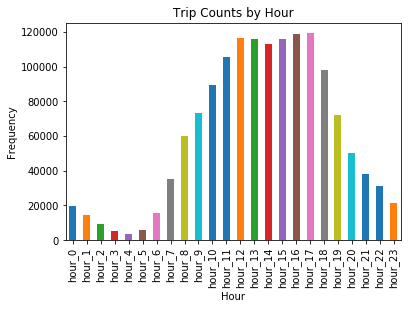

In [64]:
hourly_trip_count.plot(kind='bar')
plt.title('Trip Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')

# Hypothesis Testing

Welch's T test used for the following tests since there is a violation of the assumption of equal variances. (Occurs when parameter of equal_var=False)

In [65]:
data.head()

,trip_id,year,month,week,day,hour,num_day_of_week,day_of_week,starttime,stoptime,tripduration,temperature,events,usertype,gender,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start_x,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,date,station_name,cumulative_sum,dpcapacity_start_y,difference,tripduration_round
0,1109427,2014,1,1,1,1,2,Wednesday,2014-01-01 01:12:00,2014-01-01 01:18:00,5.766667,10.9,not clear,Subscriber,Male,240,Sheridan Rd & Irving Park Rd,41.954245,-87.654406,23.0,245,Clarendon Ave & Junior Ter,41.961004,-87.649603,15.0,2014-01-01,NaN,NaN,NaN,00:06:00,6.0
1,1109431,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.833333,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,2014-01-01,NaN,NaN,NaN,00:10:00,11.0
2,1109432,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.866667,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,2014-01-01,NaN,NaN,NaN,00:10:00,11.0
3,1109434,2014,1,1,1,1,2,Wednesday,2014-01-01 01:44:00,2014-01-01 01:59:00,15.266667,10.9,not clear,Subscriber,Male,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,2014-01-01,NaN,NaN,NaN,00:15:00,15.0
4,1109435,2014,1,1,1,1,2,Wednesday,2014-01-01 01:45:00,2014-01-01 02:00:00,15.066667,10.9,not clear,Subscriber,Female,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,2014-01-01,NaN,NaN,NaN,00:15:00,15.0


In [66]:
# mean trip length
np.mean(data['tripduration'])

11.714163521567658

In [67]:
# median trip length
np.median(data['tripduration'])

9.7

In [68]:
male = data[data['gender']=='Male'].reset_index()
female = data[data['gender']=='Female'].reset_index()

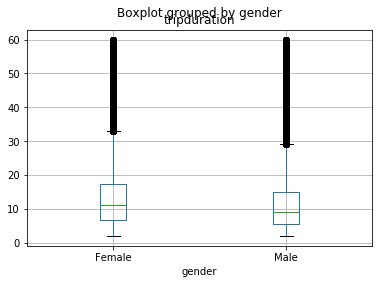

In [69]:
# boxplot of trip duration
data.boxplot(by='gender', column='tripduration')

#### Q: Is there a significant difference in trip duration between male and female riders?

In [70]:
# descriptive stats of the gender
data.groupby('gender')['tripduration'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,337138.0,12.956398,8.016653,2.0,6.866667,11.083333,17.333333,59.983333
Male,877980.0,11.237155,7.491804,2.0,5.633333,9.200000,15.016667,60.000000


In [71]:
t_stat, p_val = stats.ttest_ind(female['tripduration'], male['tripduration'],equal_var=False)

In [72]:
t_stat

107.75788857366841

In [73]:
p_val

0.0

#### Q: Is there a significant difference in weekday trip duration between male and female riders?

In [74]:
weekday = data[data['num_day_of_week'].isin([0,1,2,3,4])]
weekday.head()

,trip_id,year,month,week,day,hour,num_day_of_week,day_of_week,starttime,stoptime,tripduration,temperature,events,usertype,gender,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start_x,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,date,station_name,cumulative_sum,dpcapacity_start_y,difference,tripduration_round
0,1109427,2014,1,1,1,1,2,Wednesday,2014-01-01 01:12:00,2014-01-01 01:18:00,5.766667,10.9,not clear,Subscriber,Male,240,Sheridan Rd & Irving Park Rd,41.954245,-87.654406,23.0,245,Clarendon Ave & Junior Ter,41.961004,-87.649603,15.0,2014-01-01,NaN,NaN,NaN,00:06:00,6.0
1,1109431,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.833333,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,2014-01-01,NaN,NaN,NaN,00:10:00,11.0
2,1109432,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.866667,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,2014-01-01,NaN,NaN,NaN,00:10:00,11.0
3,1109434,2014,1,1,1,1,2,Wednesday,2014-01-01 01:44:00,2014-01-01 01:59:00,15.266667,10.9,not clear,Subscriber,Male,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,2014-01-01,NaN,NaN,NaN,00:15:00,15.0
4,1109435,2014,1,1,1,1,2,Wednesday,2014-01-01 01:45:00,2014-01-01 02:00:00,15.066667,10.9,not clear,Subscriber,Female,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,2014-01-01,NaN,NaN,NaN,00:15:00,15.0


In [75]:
# descriptive stats of the gender
weekday.groupby('gender')['tripduration'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,40875.0,12.140185,7.617680,2.0,6.383333,10.233333,16.15,59.933333
Male,169456.0,10.166519,6.638439,2.0,5.383333,8.350000,13.15,59.983333


In [76]:
weekdaymale = weekday[weekday['gender']=='Male']
weekdayfemale = weekday[weekday['gender']=='Female']



In [77]:
t_stat, p_val = stats.ttest_ind(weekdayfemale['tripduration'], weekdaymale['tripduration'],equal_var=False)


In [78]:
t_stat

48.15635943353504

In [79]:
p_val

0.0

#### Q: Is there a significant difference in weekend trips taken between male and female riders?

In [80]:
weekend = data[data['num_day_of_week'].isin([5,6])]
weekend.head()

,trip_id,year,month,week,day,hour,num_day_of_week,day_of_week,starttime,stoptime,tripduration,temperature,events,usertype,gender,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start_x,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,date,station_name,cumulative_sum,dpcapacity_start_y,difference,tripduration_round
212,1110370,2014,1,1,4,0,5,Saturday,2014-01-04 00:30:00,2014-01-04 00:39:00,8.916667,19.9,clear,Subscriber,Male,299,Halsted St & Roscoe St,41.943662,-87.648917,15.0,157,Lake Shore Dr & Wellington Ave,41.936669,-87.636794,15.0,2014-01-04,NaN,NaN,NaN,00:09:00,9.0
213,1110371,2014,1,1,4,1,5,Saturday,2014-01-04 01:57:00,2014-01-04 02:13:00,16.383333,21.0,clear,Subscriber,Male,67,Sheffield Ave & Fullerton Ave,41.925602,-87.653708,15.0,256,Broadway & Sheridan Rd,41.952833,-87.649993,15.0,2014-01-04,NaN,NaN,NaN,00:16:00,16.0
214,1110372,2014,1,1,4,2,5,Saturday,2014-01-04 02:43:00,2014-01-04 02:52:00,9.116667,21.9,clear,Subscriber,Male,157,Lake Shore Dr & Wellington Ave,41.936669,-87.636794,15.0,299,Halsted St & Roscoe St,41.943662,-87.648917,15.0,2014-01-04,NaN,NaN,NaN,00:09:00,9.0
215,1110373,2014,1,1,4,3,5,Saturday,2014-01-04 03:35:00,2014-01-04 03:49:00,14.466667,21.9,clear,Subscriber,Male,117,Wilton Ave & Belmont Ave,41.940180,-87.653040,23.0,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,2014-01-04,NaN,NaN,NaN,00:14:00,14.0
216,1110445,2014,1,1,4,8,5,Saturday,2014-01-04 08:57:00,2014-01-04 09:09:00,12.066667,27.0,cloudy,Subscriber,Male,199,Wabash Ave & Grand Ave,41.891738,-87.626937,15.0,37,Dearborn St & Adams St,41.879356,-87.629791,19.0,2014-01-04,NaN,NaN,NaN,00:12:00,12.0


In [81]:
# descriptive stats of the gender
weekend.groupby('gender')['tripduration'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,296263.0,13.069009,8.063680,2.0,6.950000,11.20,17.483333,59.983333
Male,708524.0,11.493216,7.659727,2.0,5.716667,9.45,15.466667,60.000000


In [82]:
weekendmale = weekend[weekend['gender']=='Male']
weekendfemale = weekend[weekend['gender']=='Female']



In [83]:
t_stat, p_val = stats.ttest_ind(weekendfemale['tripduration'], weekendmale['tripduration'],equal_var=False)


In [84]:
t_stat

90.63397325186365

In [85]:
p_val

0.0

## Departure Joined Dataframe

In [86]:
dfmodel = data.copy()

In [87]:
# dataframe for
dfmodel = pd.get_dummies(dfmodel, columns = ['events','usertype','gender'])

In [88]:
dfmodel.head()

,trip_id,year,month,week,day,hour,num_day_of_week,day_of_week,starttime,stoptime,tripduration,temperature,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start_x,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,date,station_name,cumulative_sum,dpcapacity_start_y,difference,tripduration_round,events_clear,events_cloudy,events_not clear,events_rain or snow,events_tstorms,usertype_Customer,usertype_Dependent,usertype_Subscriber,gender_Female,gender_Male
0,1109427,2014,1,1,1,1,2,Wednesday,2014-01-01 01:12:00,2014-01-01 01:18:00,5.766667,10.9,240,Sheridan Rd & Irving Park Rd,41.954245,-87.654406,23.0,245,Clarendon Ave & Junior Ter,41.961004,-87.649603,15.0,2014-01-01,NaN,NaN,NaN,00:06:00,6.0,0,0,1,0,0,0,0,1,0,1
1,1109431,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.833333,10.9,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,2014-01-01,NaN,NaN,NaN,00:10:00,11.0,0,0,1,0,0,0,0,1,0,1
2,1109432,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.866667,10.9,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,2014-01-01,NaN,NaN,NaN,00:10:00,11.0,0,0,1,0,0,0,0,1,0,1
3,1109434,2014,1,1,1,1,2,Wednesday,2014-01-01 01:44:00,2014-01-01 01:59:00,15.266667,10.9,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,2014-01-01,NaN,NaN,NaN,00:15:00,15.0,0,0,1,0,0,0,0,1,0,1
4,1109435,2014,1,1,1,1,2,Wednesday,2014-01-01 01:45:00,2014-01-01 02:00:00,15.066667,10.9,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,2014-01-01,NaN,NaN,NaN,00:15:00,15.0,0,0,1,0,0,0,0,1,1,0


In [89]:
dfdmodel = dfmodel.groupby(['from_station_name','year','month','day','hour']).agg({'tripduration':'mean',
                                                                        'temperature':'mean'}).reset_index()
dfdmodel.head()

,from_station_name,year,month,day,hour,tripduration,temperature
0,2112 W Peterson Ave,2015,6,14,21,12.383333,77.0
1,2112 W Peterson Ave,2015,7,19,15,16.600000,82.9
2,2112 W Peterson Ave,2015,7,19,16,9.716667,82.9
3,2112 W Peterson Ave,2015,7,19,18,13.250000,81.0
4,2112 W Peterson Ave,2015,8,15,12,15.508333,87.1


In [90]:
dfdmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710205 entries, 0 to 710204
Data columns (total 7 columns):
from_station_name    710205 non-null object
year                 710205 non-null int64
month                710205 non-null int64
day                  710205 non-null int64
hour                 710205 non-null int64
tripduration         710205 non-null float64
temperature          710205 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 37.9+ MB


#### event percentages

In [91]:
dfdevents = dfmodel.copy()
dfdevents = dfdevents[['from_station_name','year','month','day','hour','events_cloudy','events_clear','events_not clear','events_rain or snow','events_tstorms']]
dfdevents.head()

,from_station_name,year,month,day,hour,events_cloudy,events_clear,events_not clear,events_rain or snow,events_tstorms
0,Sheridan Rd & Irving Park Rd,2014,1,1,1,0,0,1,0,0
1,Bissell St & Armitage Ave,2014,1,1,1,0,0,1,0,0
2,Bissell St & Armitage Ave,2014,1,1,1,0,0,1,0,0
3,Clark St & Congress Pkwy,2014,1,1,1,0,0,1,0,0
4,Clark St & Congress Pkwy,2014,1,1,1,0,0,1,0,0


In [92]:
dfdevents['sum'] = (dfdevents['events_cloudy'] +
                   dfdevents['events_clear'] +
                   dfdevents['events_not clear'] +
                   dfdevents['events_rain or snow'] + 
                   dfdevents['events_tstorms'])

In [93]:
dfdevents = dfdevents.sort_values(['from_station_name','year','month','day','hour'])

In [94]:
dfdevents = dfdevents.groupby(['from_station_name','year','month','day','hour']).sum().reset_index()
dfdevents.head();

In [95]:
dfdevents['events_cloudy_pct'] = (dfdevents['events_cloudy'] / dfdevents['sum'])*100
dfdevents['events_clear_pct'] = (dfdevents['events_clear'] / dfdevents['sum'])*100
dfdevents['events_not clear_pct'] = (dfdevents['events_not clear'] / dfdevents['sum'])*100
dfdevents['events_rain or snow_pct'] = (dfdevents['events_rain or snow'] / dfdevents['sum'])*100
dfdevents['events_tstorms_pct'] = (dfdevents['events_tstorms'] / dfdevents['sum'])*100
#dfdevents['events_unknown_pct'] = (dfdevents['events_unknown'] / dfdevents['sum'])*100

In [96]:
dfdevents_pct = dfdevents[['from_station_name','year','month','day','hour','events_cloudy_pct','events_clear_pct','events_not clear_pct','events_rain or snow_pct','events_tstorms_pct']]
dfdevents_pct.head();

#### usertype percentage

In [97]:
dfdusertype = dfmodel.copy()
dfdusertype = dfdusertype[['from_station_name','year','month','day','hour','usertype_Customer','usertype_Dependent','usertype_Subscriber']]
dfdusertype.head();

In [98]:
dfdusertype['sum'] = (dfdusertype['usertype_Customer'] +
                   dfdusertype['usertype_Dependent'] +
                   dfdusertype['usertype_Subscriber'])

In [99]:
dfdusertype = dfdusertype.sort_values(['from_station_name','year','month','day','hour'])

In [100]:
dfdusertype = dfdusertype.groupby(['from_station_name','year','month','day','hour']).sum().reset_index()
dfdusertype.head();

In [101]:
dfdusertype['usertype_Customer_pct'] = (dfdusertype['usertype_Customer'] / dfdusertype['sum'])*100
dfdusertype['usertype_Dependent_pct'] = (dfdusertype['usertype_Dependent'] / dfdusertype['sum'])*100
dfdusertype['usertype_Subscriber_pct'] = (dfdusertype['usertype_Subscriber'] / dfdusertype['sum'])*100

In [102]:
dfdusertype_pct = dfdusertype[['from_station_name','year','month','day','hour','usertype_Customer_pct','usertype_Dependent_pct','usertype_Subscriber_pct']]
dfdusertype_pct.head();

#### gender percentages

In [103]:
dfdgender = dfmodel.copy()
dfdgender = dfdgender[['from_station_name','year','month','day','hour','gender_Female','gender_Male']]
dfdgender.head();

In [104]:
dfdgender['sum'] = (dfdgender['gender_Female'] + dfdgender['gender_Male'])

In [105]:
dfdgender = dfdgender.sort_values(['from_station_name','year','month','day','hour'])

In [106]:
dfdgender = dfdgender.groupby(['from_station_name','year','month','day','hour']).sum().reset_index()
dfdgender.head();

In [107]:
dfdgender['gender_Female_pct'] = (dfdgender['gender_Female'] / dfdgender['sum'])*100
dfdgender['gender_Male_pct'] = (dfdgender['gender_Male'] / dfdgender['sum'])*100

In [108]:
dfdgender_pct = dfdgender[['from_station_name','year','month','day','hour','gender_Female_pct','gender_Male_pct','sum']]
dfdgender_pct.head();

### Join

In [109]:
joindf = pd.merge(dfdmodel, dfdevents_pct, how='left',on=['from_station_name','year','month','day','hour'])

In [110]:
joindf = pd.merge(joindf, dfdusertype_pct, how='left', on=['from_station_name','year','month','day','hour'])

In [111]:
departure_joindf = pd.merge(joindf, dfdgender_pct, how='left', on=['from_station_name','year','month','day','hour'])

In [112]:
departure_joindf = departure_joindf.rename(columns={'sum':'trip_count'})

In [113]:
departure_joindf['year'] = departure_joindf['year'].astype(str)
departure_joindf['month'] = departure_joindf['month'].astype(str)
departure_joindf['day'] = departure_joindf['day'].astype(str)

In [114]:
departure_joindf.head()

,from_station_name,year,month,day,hour,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count
0,2112 W Peterson Ave,2015,6,14,21,12.383333,77.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
1,2112 W Peterson Ave,2015,7,19,15,16.600000,82.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,50.0,50.0,2
2,2112 W Peterson Ave,2015,7,19,16,9.716667,82.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
3,2112 W Peterson Ave,2015,7,19,18,13.250000,81.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1
4,2112 W Peterson Ave,2015,8,15,12,15.508333,87.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,2


In [115]:
departure_joindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710205 entries, 0 to 710204
Data columns (total 18 columns):
from_station_name          710205 non-null object
year                       710205 non-null object
month                      710205 non-null object
day                        710205 non-null object
hour                       710205 non-null int64
tripduration               710205 non-null float64
temperature                710205 non-null float64
events_cloudy_pct          710205 non-null float64
events_clear_pct           710205 non-null float64
events_not clear_pct       710205 non-null float64
events_rain or snow_pct    710205 non-null float64
events_tstorms_pct         710205 non-null float64
usertype_Customer_pct      710205 non-null float64
usertype_Dependent_pct     710205 non-null float64
usertype_Subscriber_pct    710205 non-null float64
gender_Female_pct          710205 non-null float64
gender_Male_pct            710205 non-null float64
trip_count                 7

## Arrival Joined Dataframe

In [116]:
dfmodel_end = dfmodel.drop(columns=['year','month','day','hour'])

In [117]:
dfmodel_end['year'] = dfmodel_end.stoptime.dt.year
dfmodel_end['month'] = dfmodel_end.stoptime.dt.month
dfmodel_end['day'] = dfmodel_end.stoptime.dt.day
dfmodel_end['hour'] = dfmodel_end.stoptime.dt.hour

In [118]:
dfamodel = dfmodel_end.groupby(['to_station_name','year','month','day','hour']).agg({'tripduration':'mean',
                                                                                  'temperature':'mean'}).reset_index()
dfamodel.head()

,to_station_name,year,month,day,hour,tripduration,temperature
0,2112 W Peterson Ave,2015,6,14,17,11.800000,81.0
1,2112 W Peterson Ave,2015,6,14,20,12.866667,78.1
2,2112 W Peterson Ave,2015,7,19,14,14.716667,84.9
3,2112 W Peterson Ave,2015,7,19,15,13.683333,82.9
4,2112 W Peterson Ave,2015,7,19,18,9.900000,81.0


In [119]:
dfamodel.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705391 entries, 0 to 705390
Data columns (total 7 columns):
to_station_name    705391 non-null object
year               705391 non-null int64
month              705391 non-null int64
day                705391 non-null int64
hour               705391 non-null int64
tripduration       705391 non-null float64
temperature        705391 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 37.7+ MB


#### event percentages

In [120]:
dfaevents = dfmodel_end.copy()
dfaevents = dfaevents[['to_station_name','year','month','day','hour','events_cloudy','events_clear','events_not clear','events_rain or snow','events_tstorms']]
dfaevents.head()

,to_station_name,year,month,day,hour,events_cloudy,events_clear,events_not clear,events_rain or snow,events_tstorms
0,Clarendon Ave & Junior Ter,2014,1,1,1,0,0,1,0,0
1,Clark St & Armitage Ave,2014,1,1,1,0,0,1,0,0
2,Clark St & Armitage Ave,2014,1,1,1,0,0,1,0,0
3,Peoria St & Jackson Blvd,2014,1,1,1,0,0,1,0,0
4,Peoria St & Jackson Blvd,2014,1,1,2,0,0,1,0,0


In [121]:
dfaevents['sum'] = (dfaevents['events_cloudy'] +
                   dfaevents['events_clear'] +
                   dfaevents['events_not clear'] +
                   dfaevents['events_rain or snow'] + 
                   dfaevents['events_tstorms'])

In [122]:
dfaevents = dfaevents.sort_values(['to_station_name','year','month','day','hour'])

In [123]:
dfaevents = dfaevents.groupby(['to_station_name','year','month','day','hour']).sum().reset_index()
dfaevents.head();

In [124]:
dfaevents['events_cloudy_pct'] = (dfaevents['events_cloudy'] / dfaevents['sum'])*100
dfaevents['events_clear_pct'] = (dfaevents['events_clear'] / dfaevents['sum'])*100
dfaevents['events_not clear_pct'] = (dfaevents['events_not clear'] / dfaevents['sum'])*100
dfaevents['events_rain or snow_pct'] = (dfaevents['events_rain or snow'] / dfaevents['sum'])*100
dfaevents['events_tstorms_pct'] = (dfaevents['events_tstorms'] / dfaevents['sum'])*100
#dfaevents['events_unknown_pct'] = (dfaevents['events_unknown'] / dfaevents['sum'])*100

In [125]:
dfaevents_pct = dfaevents[['to_station_name','year','month','day','hour','events_cloudy_pct','events_clear_pct','events_not clear_pct','events_rain or snow_pct','events_tstorms_pct']]
dfaevents_pct.head();

#### usertype percentage

In [126]:
dfausertype = dfmodel_end.copy()
dfausertype = dfausertype[['to_station_name','year','month','day','hour','usertype_Customer','usertype_Dependent','usertype_Subscriber']]
dfausertype.head();

In [127]:
dfausertype['sum'] = (dfausertype['usertype_Customer'] +
                   dfausertype['usertype_Dependent'] +
                   dfausertype['usertype_Subscriber'])

In [128]:
dfausertype = dfausertype.sort_values(['to_station_name','year','month','day','hour'])

In [129]:
dfausertype = dfausertype.groupby(['to_station_name','year','month','day','hour']).sum().reset_index()
dfausertype.head();

In [130]:
dfausertype['usertype_Customer_pct'] = (dfausertype['usertype_Customer'] / dfausertype['sum'])*100
dfausertype['usertype_Dependent_pct'] = (dfausertype['usertype_Dependent'] / dfausertype['sum'])*100
dfausertype['usertype_Subscriber_pct'] = (dfausertype['usertype_Subscriber'] / dfausertype['sum'])*100

In [131]:
dfausertype_pct = dfausertype[['to_station_name','year','month','day','hour','usertype_Customer_pct','usertype_Dependent_pct','usertype_Subscriber_pct']]
dfausertype_pct.head();

#### gender percentages

In [132]:
dfagender = dfmodel_end.copy()
dfagender = dfagender[['to_station_name','year','month','day','hour','gender_Female','gender_Male']]
dfagender.head();

In [133]:
dfagender['sum'] = (dfagender['gender_Female'] +dfagender['gender_Male'])

In [134]:
dfagender = dfagender.sort_values(['to_station_name','year','month','day','hour'])

In [135]:
dfagender = dfagender.groupby(['to_station_name','year','month','day','hour']).sum().reset_index()
dfagender.head();

In [136]:
dfagender['gender_Female_pct'] = (dfagender['gender_Female'] / dfagender['sum'])*100
dfagender['gender_Male_pct'] = (dfagender['gender_Male'] / dfagender['sum'])*100

In [137]:
dfagender_pct = dfagender[['to_station_name','year','month','day','hour','gender_Female_pct','gender_Male_pct','sum']]
dfagender_pct.head()

,to_station_name,year,month,day,hour,gender_Female_pct,gender_Male_pct,sum
0,2112 W Peterson Ave,2015,6,14,17,0.0,100.0,1
1,2112 W Peterson Ave,2015,6,14,20,0.0,100.0,1
2,2112 W Peterson Ave,2015,7,19,14,0.0,100.0,1
3,2112 W Peterson Ave,2015,7,19,15,100.0,0.0,1
4,2112 W Peterson Ave,2015,7,19,18,100.0,0.0,1


### Join

In [138]:
joindf = pd.merge(dfamodel, dfaevents_pct, how='left',on=['to_station_name','year','month','day','hour'])

In [139]:
joindf = pd.merge(joindf, dfausertype_pct, how='left', on=['to_station_name','year','month','day','hour'])

In [140]:
arrival_joindf = pd.merge(joindf, dfagender_pct, how='left', on=['to_station_name','year','month','day','hour'])

In [141]:
arrival_joindf = arrival_joindf.rename(columns={'sum':'trip_count'})

In [142]:
arrival_joindf['year'] = arrival_joindf['year'].astype(str)
arrival_joindf['month'] = arrival_joindf['month'].astype(str)
arrival_joindf['day'] = arrival_joindf['day'].astype(str)

In [143]:
arrival_joindf.head()

,to_station_name,year,month,day,hour,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count
0,2112 W Peterson Ave,2015,6,14,17,11.800000,81.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
1,2112 W Peterson Ave,2015,6,14,20,12.866667,78.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
2,2112 W Peterson Ave,2015,7,19,14,14.716667,84.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
3,2112 W Peterson Ave,2015,7,19,15,13.683333,82.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1
4,2112 W Peterson Ave,2015,7,19,18,9.900000,81.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1


# Linear Modeling - departures

In [144]:
departure_joindf.head()

,from_station_name,year,month,day,hour,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count
0,2112 W Peterson Ave,2015,6,14,21,12.383333,77.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
1,2112 W Peterson Ave,2015,7,19,15,16.600000,82.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,50.0,50.0,2
2,2112 W Peterson Ave,2015,7,19,16,9.716667,82.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
3,2112 W Peterson Ave,2015,7,19,18,13.250000,81.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1
4,2112 W Peterson Ave,2015,8,15,12,15.508333,87.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,2


In [145]:
# one hot encoding
departure_joindf = pd.get_dummies(departure_joindf, columns = ['from_station_name'])

In [146]:
feature_headers = departure_joindf[departure_joindf['year'].isin(['2014','2015','2016'])].drop(['trip_count'], axis=1).columns
target_headers = 'trip_count'


In [147]:
# linear model using the numerical day of week, the numerical mapping of events, trip duration, and temperature
X_traindep = departure_joindf[departure_joindf['year'].isin(['2014','2015','2016'])].drop(['trip_count'], axis=1).values
X_testdep = departure_joindf[departure_joindf['year'] == '2017'].drop(['trip_count'], axis=1).values
y_traindep = departure_joindf[departure_joindf['year'].isin(['2014','2015','2016'])]['trip_count'].values
y_testdep = departure_joindf[departure_joindf['year'] == '2017']['trip_count'].values

In [148]:
lm = linear_model.LinearRegression()

In [149]:
lm.fit(X_traindep, y_traindep)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
y_pred = lm.predict(X_testdep)

In [151]:
errors = abs(y_pred - y_testdep)

In [152]:
print('Mean Absolute Error: {}'.format(round(np.mean(errors), 2)),            
      'Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_testdep, y_pred))),
      'R^2 (Score): {}'.format(lm.score(X_testdep, y_testdep)))

Mean Absolute Error: 1762641.14 Root Mean Squared Error: 16431137.147367507 R^2 (Score): -119762019758879.27


# Linear Modeling - arrivals

In [153]:
arrival_joindf.head()

,to_station_name,year,month,day,hour,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count
0,2112 W Peterson Ave,2015,6,14,17,11.800000,81.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
1,2112 W Peterson Ave,2015,6,14,20,12.866667,78.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
2,2112 W Peterson Ave,2015,7,19,14,14.716667,84.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
3,2112 W Peterson Ave,2015,7,19,15,13.683333,82.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1
4,2112 W Peterson Ave,2015,7,19,18,9.900000,81.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1


In [154]:
# one hot encoding
arrival_joindf = pd.get_dummies(arrival_joindf, columns = ['to_station_name'])

In [155]:
feature_headers = arrival_joindf[arrival_joindf['year'].isin(['2014','2015','2016'])].drop(['trip_count'], axis=1).columns
target_headers = 'trip_count'


In [156]:
# linear model using the numerical day of week, the numerical mapping of events, trip duration, and temperature
X_trainarr = arrival_joindf[arrival_joindf['year'].isin(['2014','2015','2016'])].drop(['trip_count'], axis=1).values
X_testarr = arrival_joindf[arrival_joindf['year'] == '2017'].drop(['trip_count'], axis=1).values
y_trainarr = arrival_joindf[arrival_joindf['year'].isin(['2014','2015','2016'])]['trip_count'].values
y_testarr = arrival_joindf[arrival_joindf['year'] == '2017']['trip_count'].values

In [157]:
lm = linear_model.LinearRegression()

In [158]:
lm.fit(X_trainarr, y_trainarr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [159]:
y_pred = lm.predict(X_testarr)

In [160]:
errors = abs(y_pred - y_testarr)

In [161]:
print('Mean Absolute Error: {}'.format(round(np.mean(errors), 2)),            
      'Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_testarr, y_pred))),
      'R^2 (Score): {}'.format(lm.score(X_testarr, y_testarr)))

Mean Absolute Error: 1764.03 Root Mean Squared Error: 13088.412723137442 R^2 (Score): -73216879.79910415


# Random Forest Modeling - departures

In [162]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [ ]:
rf.fit(X_traindep, y_traindep)

In [ ]:
y_pred = rf.predict(X_testdep)

In [ ]:
errors = abs(y_pred - y_testdep)

In [ ]:
print('Mean Absolute Error: {}'.format(round(np.mean(errors), 2)),            
      'Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_testdep, y_pred))),
      'R^2 (Score): {}'.format(lm.score(X_testdep, y_testdep)))

# Random Forest Modeling - arrivals

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [ ]:
rf.fit(X_trainarr, y_trainarr)

In [ ]:
y_pred = rf.predict(X_testarr)

In [ ]:
errors = abs(y_pred - y_testarr)

In [ ]:
print('Mean Absolute Error: {}'.format(round(np.mean(errors), 2)),            
      'Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_testarr, y_pred))),
      'R^2 (Score): {}'.format(lm.score(X_testarr, y_testarr)))